# Descision Tree


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

wine = pd.read_csv('./wine.csv')
wine.head()
wine.info()
wine.describe()

# 1. 스케일이 다르다 (화이트와 레드)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
from sklearn.model_selection import train_test_split 

# 데이터 분리
X= wine[['alcohol', 'sugar', 'pH']]
y= wine['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [22]:
#스케일링 
#스케일링 
from sklearn.preprocessing import StandardScaler

#스케일러 객체 생성 
ss = StandardScaler()

# 훈련 세트의 통계(평균, 표준편차)를 사용하여 스케일러를 학습시키고 , 훈련세트를 변환한다.(데이터 누수 방지)
ss.fit(X_train) #오직 훈련 데이터에서만 수행해야함 , 테스트 정보가 학습과정에 유출되는  데이터 누수를 막기 위함 
X_train_scaled= ss.transform(X_train)
X_test_scaled= ss.transform(X_test)
#표준화는  머신러닝 모델의 성능을 향상시키기 위해 특성의 스케일을 뭐처 주는 전처리 과정이다. 

In [13]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train_scaled, y_train)


print('훈련덤수: ', lr.score(X_train_scaled, y_train))
print('테스트점수: ',lr.score(X_test_scaled, y_test))

print(lr.classes_)
lr.predict_proba(X_test_scaled[:5])

print(lr.coef_, lr.intercept_)
      

훈련덤수:  0.7808350971714451
테스트점수:  0.7776923076923077
[0. 1.]
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)#학습 시킴

print('훈련덤수: ', dt.score(X_train_scaled, y_train))
print('테스트점수: ', dt.score(X_test_scaled, y_test))
#지니가 말하는 것은 

훈련덤수:  0.996921300750433
테스트점수:  0.8592307692307692


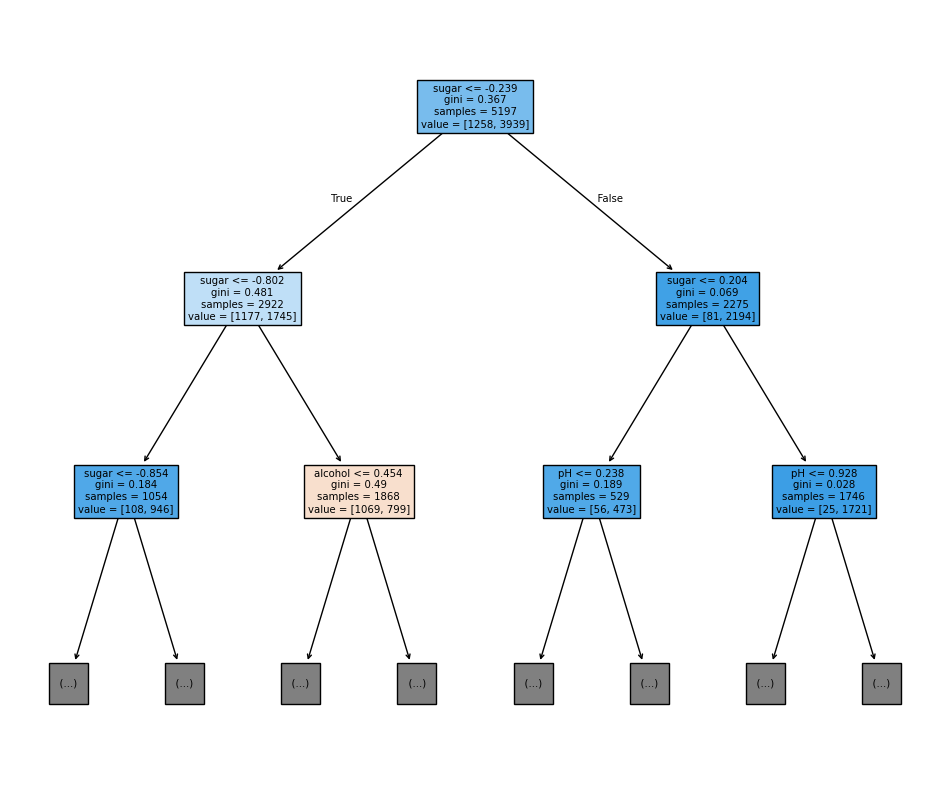

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 10))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH']) #표시되는 숫자는 스케일링된 값이다.
plt.show()
#지니 불순도(순수도) 를 보고 R/W 의 비율을 알 수 있음. 
# 지니 불순도 1- (음성클래스비율 ^2+ 양성클래스비율^2) >> 0.5에 가까우면 분류가 잘 안된것 , 0이나오면 
#-0.239 라는 기준은 지니 불순도를 최소화하는 방식으로 결정된다. 지니 불순도는 해당 노드에 포함된 클래스가 얼마나 섞여 있는지를 나타낸다 
#샘플 5197개 중에서 R/W를 분류하고 그 과정을 반복한다. 


훈련덤수:  0.8454877814123533
테스트점수:  0.8415384615384616


[Text(0.5, 0.875, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.25, 0.625, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'sugar <= -0.854\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(0.0625, 0.125, 'gini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(0.1875, 0.125, 'gini = 0.318\nsamples = 499\nvalue = [99, 400]'),
 Text(0.375, 0.375, 'alcohol <= 0.454\ngini = 0.49\nsamples = 1868\nvalue = [1069, 799]'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 1141\nvalue = [798, 343]'),
 Text(0.4375, 0.125, 'gini = 0.468\nsamples = 727\nvalue = [271.0, 456.0]'),
 Text(0.75, 0.625, 'sugar <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'pH <= 0.238\ngini = 0.189\nsamples = 529\nvalue = [56, 473]'),
 Text(0.5625, 0.125, 'gini = 0.098\nsamples = 329\nvalue = [17, 312]'),
 Text(0.6875, 0.125, 'gini = 0.314\nsamp

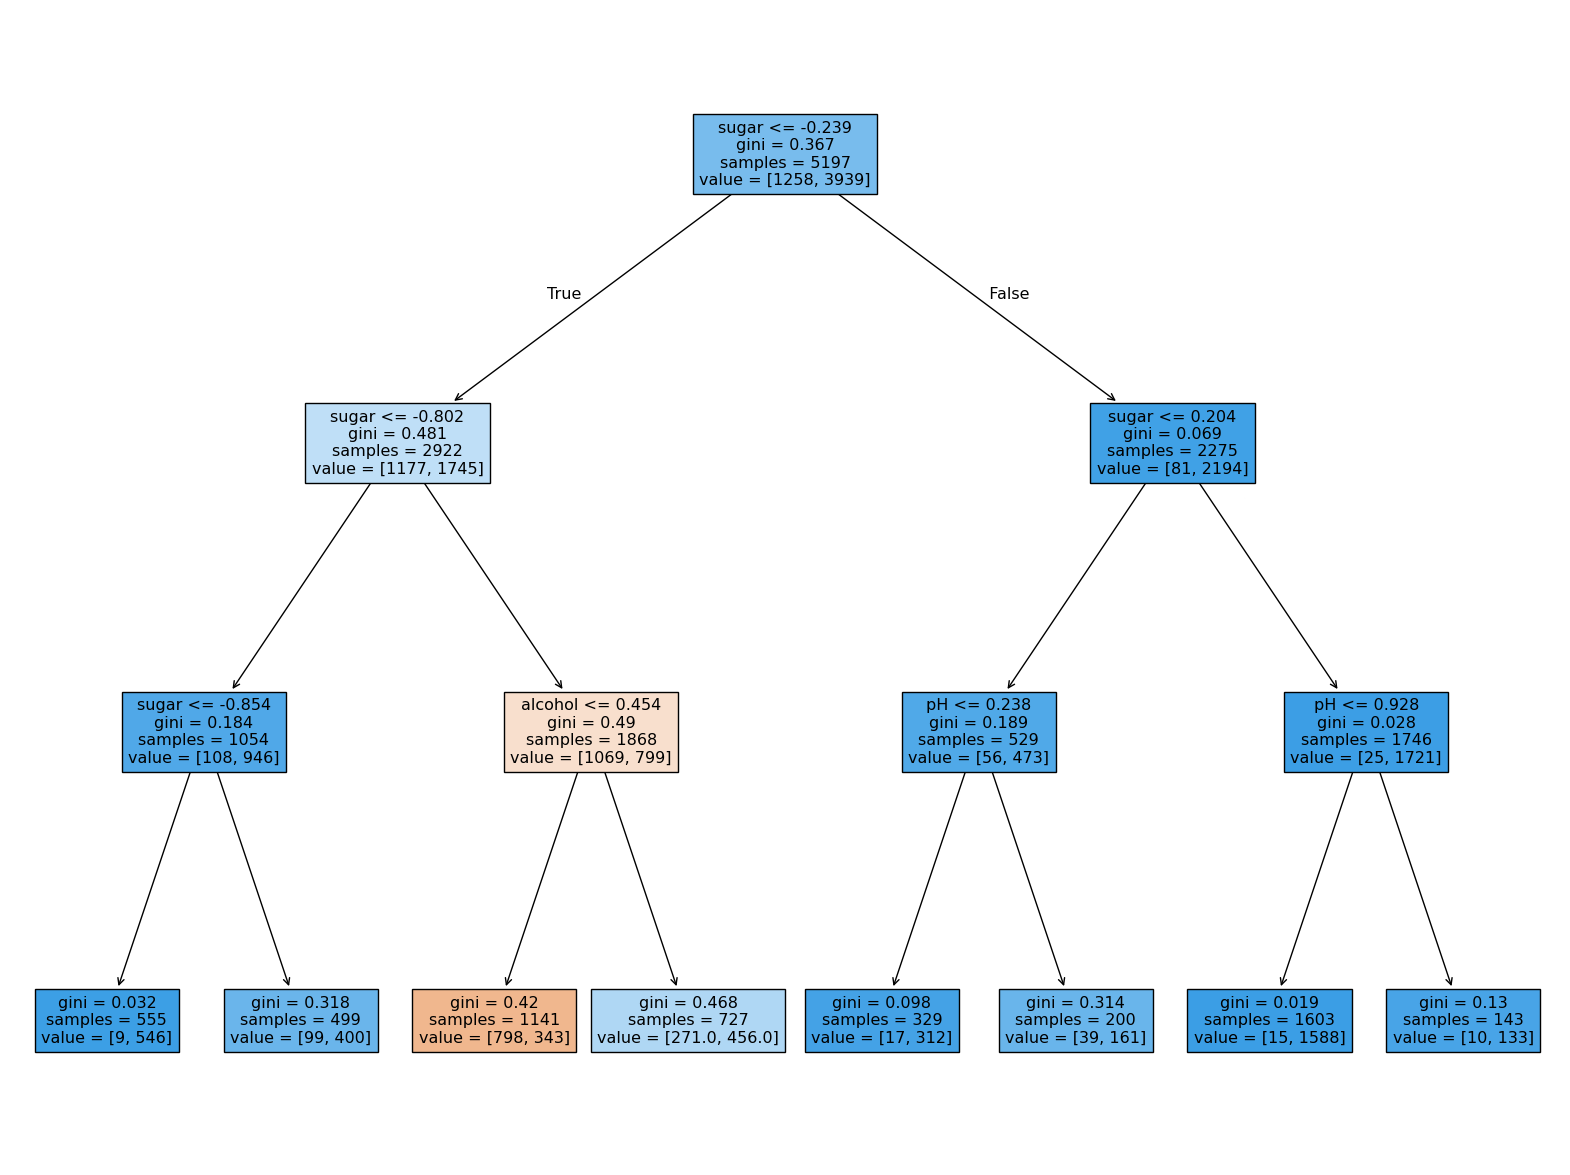

In [27]:
dt= DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
print('훈련덤수: ', dt.score(X_train_scaled, y_train))
print('테스트점수: ', dt.score(X_test_scaled, y_test))

plt.figure(figsize=(20,15))
plot_tree(dt, filled =True, feature_names=['alcohol', 'sugar', 'pH'])

- 언제 정지하느냐 
1. 특성에 대해 다 시도해 보았을 때 
2. 리프노드 ->순수노드 (예시 부정입학)
3. 지니가 거의 고정이 될때 